<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>CNN with Tensorflow </h1>

<h2>Imports<h2>

In [60]:
!yes | pip install tensorflow tensorflow_addons tensorflow_datasets tensorflow_hub numpy matplotlib seaborn sklearn

yes: stdout: Broken pipe


In [61]:
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow_addons as tfa

<h2>Dataset</h2>

In [62]:
# load the whole dataset, for data info
all_ds = tfds.load("eurosat", with_info=True)

<h3>Filter dataset</h3>

In [70]:
classNames = all_ds[1].features["label"].names
print(type(classNames))
# classNames.remove("AnnualCrop")
print(classNames)
num_classes = len(classNames)
# lambda x: x["label"]

<class 'list'>
['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


<h3>Split Dataset</h3>

In [64]:
train_ds = tfds.load("eurosat", split="train[:60%]", as_supervised=True)
test_ds = tfds.load("eurosat", split="train[60%:80%]", as_supervised=True)
valid_ds = tfds.load("eurosat", split="train[80%:]", as_supervised=True)

In [65]:
num_examples = all_ds[1].splits["train"].num_examples

<h3>Visualise Dataset</h3>

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Bar Plot showing Number of Samples on Each Class')

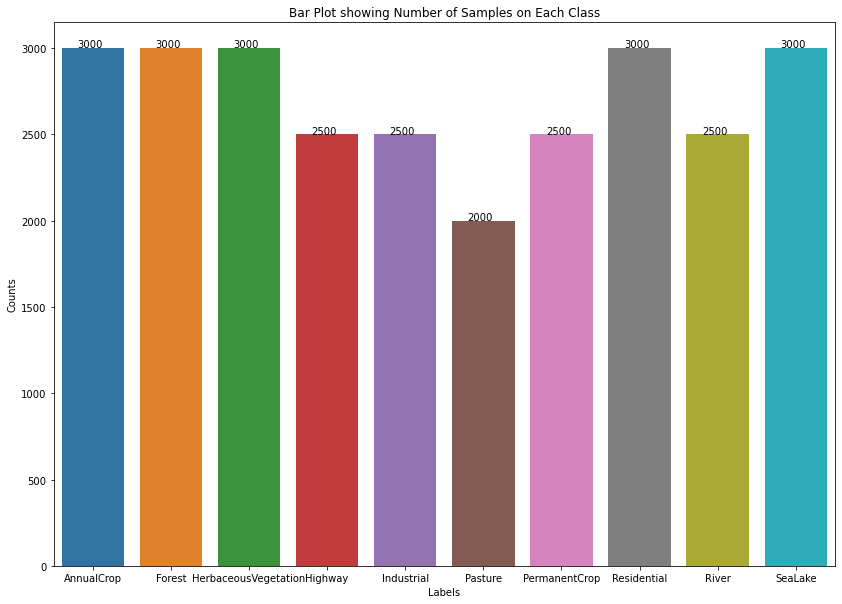

In [72]:
# make a plot for number of samples on each class
fig, ax = plt.subplots(1, 1, figsize=(14,10))
labels, counts = np.unique(np.fromiter(all_ds[0]["train"].map(lambda x: x["label"]), np.int32), 
                       return_counts=True)

# print(type(labels))

plt.ylabel('Counts')
plt.xlabel('Labels')
sns.barplot(x = [classNames[l] for l in labels], y = counts, ax=ax) 

for i, x_ in enumerate(labels):
  ax.text(x_-0.2, counts[i]+5, counts[i])

# set the title
ax.set_title("Bar Plot showing Number of Samples on Each Class")